# ECMWF ERA5 download

In [3]:
import xarray as xr
from src.data_loading.ecmwf import DATA_DIREC
from src.plot_utils import ps_defaults
ps_defaults()

In [2]:
xr.open_dataset(DATA_DIREC / "total_precipitation.nc")

<xarray.Dataset>
Dimensions:    (time: 868, longitude: 1440, latitude: 721, expver: 2)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-04-01
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
Data variables:
    tp         (time, latitude, longitude, expver) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-11 20:33:30 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

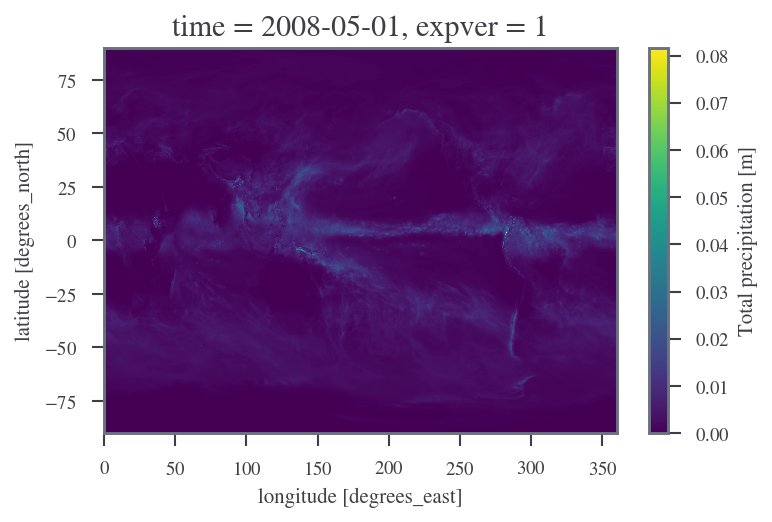

In [7]:
xr.open_dataset(DATA_DIREC / "total_precipitation.nc").isel(time=700, expver=0).tp.plot()